# Asgmt: Multiple Linear Regression on Housing.csv


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset & Check Data


In [2]:
dataset = pd.read_csv('housing.csv')

X = dataset.drop(columns=['median_house_value']).values     # features
y = dataset['median_house_value'].values                    # target

In [ ]:
print(X)

In [4]:
y = y.reshape(len(y), 1) # type: ignore

print(y)


[[452600]
 [358500]
 [352100]
 ...
 [ 92300]
 [ 84700]
 [ 89400]]


## Handle Nan Value

In [5]:
missing_values = dataset.isnull().sum() # count of missing values in each column
print(missing_values)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [6]:
# fill missing values with the mean value of the column (Total Bedrooms)

dataset['total_bedrooms'] = dataset['total_bedrooms'].fillna(dataset['total_bedrooms'].median())


missing_values = dataset.isnull().sum() # count of missing values in each column
print(missing_values)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## Encoding categorical data

In [7]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 

# Handle NaN for the categorical column before encoding
dataset.iloc[:, 8] = dataset.iloc[:, 8].fillna('Unknown') 

# OneHotEncoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough') 
X = np.array(ct.fit_transform(X))

# Fill any remaining NaN after encoding

# The previous fill with median was for the 'total_bedrooms' column in the original dataset.
# After OneHotEncoding, the data is transformed into a sparse matrix, and any missing values in the encoded data need to be handled separately.
# Filling with 0 ensures no NaN values remain in the transformed feature matrix.

X = pd.DataFrame(X).fillna(0).values

C:\Users\KimieCrafter\AppData\Local\Temp\ipykernel_16396\1787268763.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = pd.DataFrame(X).fillna(0).values


In [8]:
print(X)

[[0.0000e+00 0.0000e+00 0.0000e+00 ... 3.2200e+02 1.2600e+02 8.3252e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 2.4010e+03 1.1380e+03 8.3014e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 4.9600e+02 1.7700e+02 7.2574e+00]
 ...
 [0.0000e+00 1.0000e+00 0.0000e+00 ... 1.0070e+03 4.3300e+02 1.7000e+00]
 [0.0000e+00 1.0000e+00 0.0000e+00 ... 7.4100e+02 3.4900e+02 1.8672e+00]
 [0.0000e+00 1.0000e+00 0.0000e+00 ... 1.3870e+03 5.3000e+02 2.3886e+00]]


## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 20% test data

In [10]:
print(X_train)

[[0.0000e+00 1.0000e+00 0.0000e+00 ... 2.2800e+02 6.5000e+01 4.2386e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 1.4850e+03 4.4700e+02 4.3898e+00]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 1.0220e+03 3.6800e+02 3.9333e+00]
 ...
 [0.0000e+00 0.0000e+00 0.0000e+00 ... 7.0400e+02 3.9300e+02 3.1977e+00]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 1.0520e+03 4.6800e+02 5.6315e+00]
 [0.0000e+00 1.0000e+00 0.0000e+00 ... 1.0240e+03 2.9800e+02 1.3882e+00]]


## Training the Multiple Linear Regression model on the Training set

In [11]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

LinearRegression()

## Predicting the Test set results

In [12]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2) # set the decimal places to 2

print(y_pred) # Horizontal vector of predicted values
print(y_test) # Horizontal vector of real values

[[216923.34]
 [288860.14]
 [180063.18]
 ...
 [ 89900.84]
 [255333.85]
 [213195.86]]
[[136900]
 [241300]
 [200700]
 ...
 [128600]
 [259500]
 [167600]]


In [13]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) # compare the predicted and actual values

[[216923.34 136900.  ]
 [288860.14 241300.  ]
 [180063.18 200700.  ]
 ...
 [ 89900.84 128600.  ]
 [255333.85 259500.  ]
 [213195.86 167600.  ]]


In [14]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R-squared: {r2:.4f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


R-squared: 0.6368
MAE: 49867.71
RMSE: 68814.66


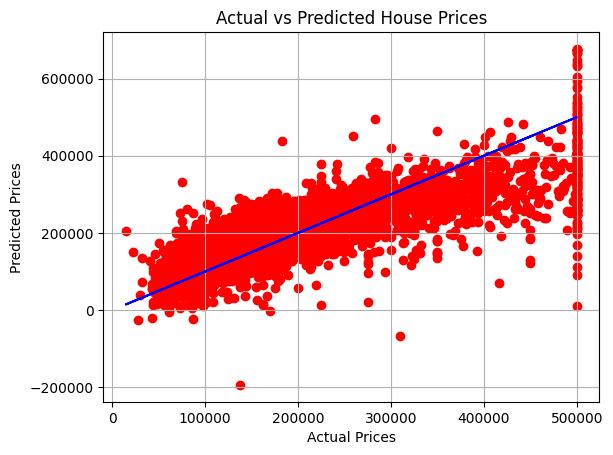

In [ ]:
# Visualizing the Multiple Regression results

plt.scatter(y_test, y_pred, color='Red')
plt.plot(y, y, color='Blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()